In [ ]:
pip install pygeos

In [ ]:
pip install mapclassify

In [ ]:
pip install pyrosm # calısmadı

In [73]:
import pygeos
import osmnx as ox
import mapclassify
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [74]:
place_name = "İstanbul, Marmara Bölgesi, Türkiye"

In [75]:
G = ox.graph_from_place(place_name, network_type='all')

In [76]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

In [77]:
G_projected = ox.project_graph(G)

In [78]:
gdfs = ox.graph_to_gdfs(G_projected)
type(gdfs)

#0 => nodes (points), 1 => edges (lines)

tuple

In [79]:
print(type(gdfs[0]))
print(gdfs[0].geometry.type.unique())
print(type(gdfs[1]))
print(gdfs[1].geometry.type.unique())

<class 'geopandas.geodataframe.GeoDataFrame'>
['Point']
<class 'geopandas.geodataframe.GeoDataFrame'>
['LineString']


In [80]:
gdfs[1].crs

<Projected CRS: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [81]:
nodes_proj = ox.graph_to_gdfs(G_projected, edges=False, nodes=True)
type(nodes_proj)

geopandas.geodataframe.GeoDataFrame

In [82]:
nodes_proj.crs

<Projected CRS: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

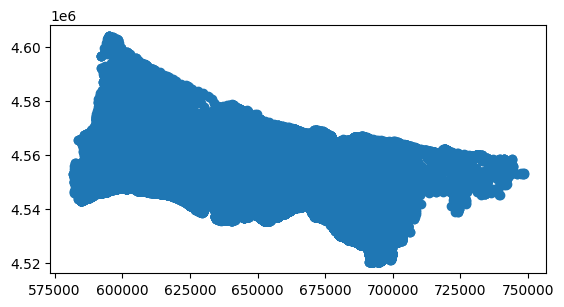

In [83]:
nodes_proj.plot()

<Axes: >

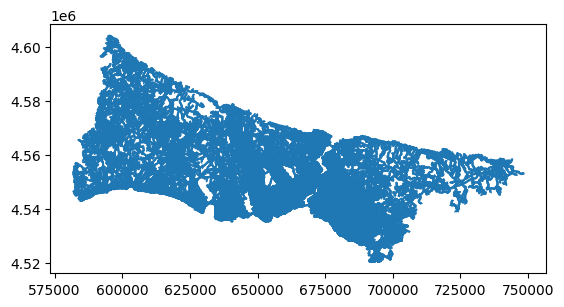

In [84]:
lines_proj = ox.graph_to_gdfs(G_projected, edges=True, nodes=False)
lines_proj.plot()

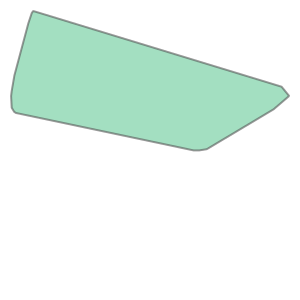

In [85]:
nodes_proj.unary_union.convex_hull   #convex_hull: en küçük kaplayan çokgen oluşturur buranın alanı degerınde

In [86]:
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

8016488734.9961195

with OSMnx we can extract some basic statistics

In [87]:
ox.basic_stats(G_projected, area=graph_area_m, clean_int_tol=15)

{'n': 285728,
 'm': 752351,
 'k_avg': 5.266204222197334,
 'edge_length_total': 71887364.24999888,
 'edge_length_avg': 95.55030065753735,
 'streets_per_node_avg': 2.906204502183895,
 'streets_per_node_counts': {0: 0,
  1: 37709,
  2: 576,
  3: 199828,
  4: 46162,
  5: 1345,
  6: 94,
  7: 10,
  8: 4},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.13197516519207078,
  2: 0.0020159032366446413,
  3: 0.6993644305073357,
  4: 0.1615592451562325,
  5: 0.0047072740508455595,
  6: 0.0003289842087579796,
  7: 3.499832008063613e-05,
  8: 1.3999328032254452e-05},
 'intersection_count': 248019,
 'street_length_total': 39794746.34600088,
 'street_segment_count': 415339,
 'street_length_avg': 95.81268878193687,
 'circuity_avg': 1.0831880833371181,
 'self_loop_proportion': 0.002121158860593395,
 'clean_intersection_count': 146384,
 'node_density_km': 35.64253745566304,
 'intersection_density_km': 30.93860768708734,
 'edge_density_km': 8967.437818027905,
 'street_density_km': 4964.11180274928,
 'cle

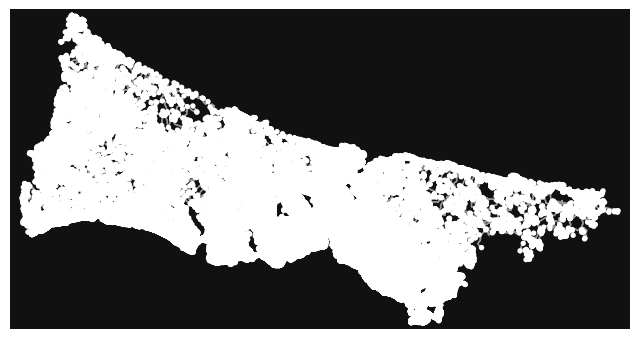

<Figure size 640x480 with 0 Axes>

In [88]:
fig, ax = ox.plot_graph(G)
plt.tight_layout()

In [89]:
import networkx as nx 

In [ ]:
# convert graph to line graph so edges become nodes and vice versa (# grafiği çizgi grafiğine dönüştürün, böylece kenarlar düğüm haline gelir ve bunun tersi de geçerlidir)
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, 'edge_centrality')  #cok uzun suruyo bu ve altındakı

In [ ]:
# color edges in original graph with closeness centralities from line graph (# orijinal grafikteki renkli kenarlar ve çizgi grafiğindeki yakınlık merkezleri)
ec = ox.plot.get_edge_colors_by_attr(G, 'edge_centrality', cmap='inferno')
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)
plt.show()

## Find the shortest path between 2 points by minimizing travel time

find the node on the graph nearest on the point given

In [91]:
point_nearest_fb_stadium = ox.distance.nearest_nodes(G, Y=40.98758065, X=29.03697729928941)
point_nearest_marmara_yelken = ox.distance.nearest_nodes(G, Y=40.96289, X=29.06768)

In [92]:
# impute missing edge speeds and calculate edge travel times with the speed module (# eksik kenar hızlarını doldurun ve hız modülü ile kenar seyahat sürelerini hesaplayın)
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

In [93]:
G = ox.graph_from_place(place_name, network_type='walk')

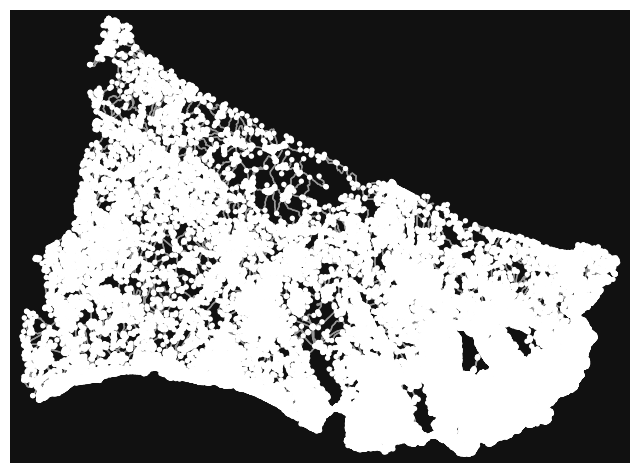

In [94]:
fig, ax = ox.plot_graph(G)
plt.show()

In [95]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [96]:
edges = ox.graph_to_gdfs(G, edges=True, nodes=False)

In [97]:
edges.head(3)

osmid  oneway                      name  \
u        v          key                                                 
27412846 513395347  0     656709696   False  Dolapdere Taksim Caddesi   
         2263863936 0     656709696   False  Dolapdere Taksim Caddesi   
         9969638097 0    1088119568   False                       NaN   

                           highway reversed  length  speed_kph  travel_time  \
u        v          key                                                       
27412846 513395347  0    secondary    False  15.637       32.6          1.7   
         2263863936 0    secondary     True  17.236       32.6          1.9   
         9969638097 0      footway    False   6.144       33.3          0.7   

                                                                  geometry  \
u        v          key                                                      
27412846 513395347  0    LINESTRING (28.98381 41.03774, 28.98385 41.03760)   
         2263863936 0    LINESTRING (28.98381 41.03774, 28.98377 41.03789)   
         9969638097 0    LINESTRING (28.98381 41.03774, 28.98388 41.03774)   

                        lanes bridge maxspeed access tunnel service width  \
u        v          key                                                     
27412846 513395347  0     NaN    NaN      NaN    NaN    NaN     NaN   NaN   
         2263863936 0     NaN    NaN      NaN    NaN    NaN     NaN   NaN   
         9969638097 0     NaN    NaN      NaN    NaN    NaN     NaN   NaN   

                        junction  ref est_width area  
u        v          key                               
27412846 513395347  0        NaN  NaN       NaN  NaN  
         2263863936 0        NaN  NaN       NaN  NaN  
         9969638097 0        NaN  NaN       NaN  NaN

In [98]:
edges.columns

Index(['osmid', 'oneway', 'name', 'highway', 'reversed', 'length', 'speed_kph',
       'travel_time', 'geometry', 'lanes', 'bridge', 'maxspeed', 'access',
       'tunnel', 'service', 'width', 'junction', 'ref', 'est_width', 'area'],
      dtype='object')

In [99]:
edges[edges.travel_time == edges.travel_time.max()].name

u           v           key
7476151610  7509970315  0      NaN
7509970315  7476151610  0      NaN
Name: name, dtype: object

In [100]:
edges[edges.travel_time == edges.travel_time.max()].osmid

u           v           key
7476151610  7509970315  0      686958421
7509970315  7476151610  0      686958421
Name: osmid, dtype: object

find the shortest path between the FB stadium and Marmara Yelken Club

In [107]:
route = ox.shortest_path(G, point_nearest_fb_stadium, point_nearest_marmara_yelken, weight='travel_time')

In [108]:
print(route)

None


In [106]:
if point_nearest_fb_stadium in G and point_nearest_marmara_yelken in G:
    print("Both nodes are in the graph.")
else:
    print("One or both of the nodes are not in the graph.")

Both nodes are in the graph.


In [105]:
G.add_node(point_nearest_fb_stadium)
G.add_node(point_nearest_marmara_yelken)

In [110]:
G.add_node('point_nearest_fb_stadium', pos=(40.98758065, 29.03697729928941))

KeyError: 'point_nearest_fb_stadium'

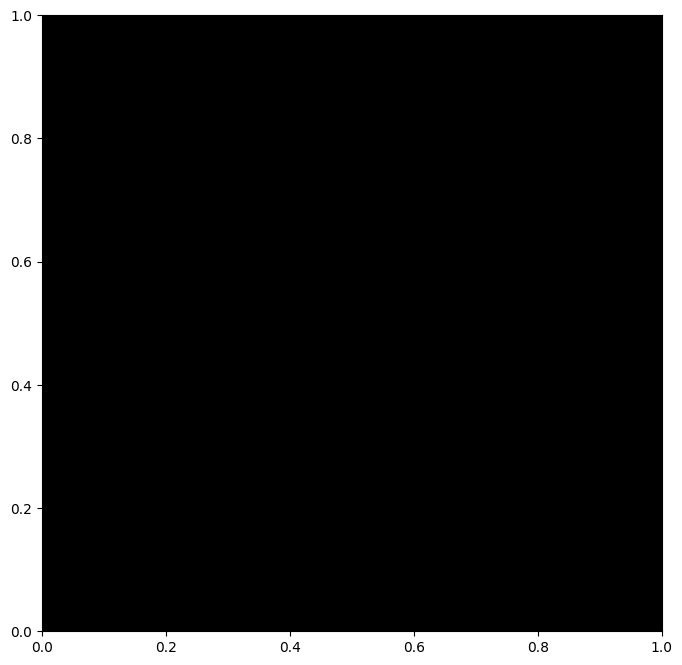

In [111]:
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')
plt.show()